# 1. Business Understanding

### 1.1. Context
- The real estate market is highly competitive, with property agents and brokers needing to provide accurate pricing and match clients with properties that best suit their needs. The availability of vast amounts of data offers an opportunity to leverage machine learning to improve decision-making, enhance client satisfaction, and optimize sales processes.

--

### 1.2. Problem Statement
- Who is the user facing the problem? 
    - The primary users are property agents and brokers who are responsible for evaluating property prices, advising clients, and closing deals in a competitive real estate market.
- What problem is the user facing?
    - Property agents and brokers often struggle to accurately estimate property prices, which can lead to overpricing or underpricing. Additionally, matching clients with suitable properties based on their preferences and budget is a challenge that requires a deep understanding of market trends and client behavior.
- Why does this problem need to be solved?
    - Accurate property pricing is critical to closing deals efficiently and maintaining client trust. Effective client-property matching increases the likelihood of successful transactions, thereby improving the agent’s reputation and profitability.

--

### 1.3. Objectives
- Develop a machine learning model that can accurately predict property prices based on historical data and current market conditions.
- Create a client matching algorithm that pairs clients with properties that best meet their needs, improving the efficiency and success rate of property transactions.
- Provide property agents with actionable insights into market trends, enabling them to set competitive prices and offer informed advice to clients.

--

### 1.4. Analytic Approach
- What solution design are you offering to solve the problem?
    - A. Type of question: Predictive (forecasting housing prices).
    - B. Type of ML algorithm: Supervised (e.g., Linear Regression, Random Forest Regressor).
- When and how will users use this solution?
    - Property agents and brokers will use the solution during the initial client consultation to provide accurate price estimates and suggest properties that meet the client’s criteria. Additionally, they can use the solution to stay informed about market trends and adjust their strategies accordingly.

--

### 1.5. Success Criteria
- What are the conditions of mis-prediction, and what are the consequences?
    - Regression:
        - Overprediction: Predicting higher property prices than the market can bear could lead to prolonged listing times or failed sales.
        - Underprediction: Predicting lower property prices might result in underselling, leading to lost revenue and client dissatisfaction.
- Explain the assumptions or research results from the data you will use.
    - The assumptions mean that old property data is still relevant for today’s market. It is also assumed that the selected features, such as location, property size, and market trends, correctly reflect what influences property prices. Before building the model, some research will be done to choose the right features and ensure the data is prepared correctly to maintain the model’s accuracy.

--

### 1.6. Project Limitation
- The project may be limited by the availability and quality of the data, especially in markets that change quickly where old data might not reflect current conditions. The model’s predictions will also be limited by the features used, which might not include all factors that affect property prices, such as unexpected economic changes or new policies.

---

# 2. Data Understanding

### 2.1. Data Source
- This data was initially featured in the following paper:
    - Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297

--

### 2.2. Data Analysis

2.2.1. Columns
- There are 10 columns in the dataset with its unique identifier and description.


| **No** | **Column Name** | **Column Description**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| 1    | longitude         | A measure of how far west a house is; a higher value is farther west                     |
| 2    | latitude        | A measure of how far north a house is; a higher value is farther north                           |
| 3    | housing_median_age      | Median age of a house within a block; a lower number is a newer building                           |
| 4    | total_rooms        | Total number of rooms within a block      |
| 5    | total_bedrooms    | Total number of bedrooms within a block                  |
| 6    | population         | Total number of people residing within a block                       |
| 7    | households            | Total number of households, a group of people residing within a home unit, for a block                          |
| 8    | median_income          | Median income for households within a block of houses (measured in tens of thousands of US Dollars)                        |
| 9    | ocean_proximity        | Location of the house w.r.t ocean/sea                     |
| 10   | median_house_value        | Median house value for households within a block (measured in US Dollars)                |

--

2.2.2. Import Libraries

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

from scipy.stats import spearmanr, kendalltau
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="Parameters: { 'verbose' } are not used.")

--

2.2.3. Load Data

In [3]:
data = pd.read_csv("data_california_house.csv")
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4280,-117.86,33.79,34.0,1883.0,408.0,1227.0,424.0,3.8929,<1H OCEAN,187500.0
11483,-120.68,35.50,19.0,3369.0,673.0,1834.0,646.0,3.7672,<1H OCEAN,173800.0
9638,-121.32,38.59,21.0,9774.0,1777.0,4674.0,1712.0,3.6817,INLAND,136100.0
6184,-118.48,34.01,40.0,2198.0,611.0,1023.0,567.0,3.7550,<1H OCEAN,398300.0
10010,-119.96,38.84,17.0,2722.0,512.0,828.0,289.0,3.5714,INLAND,109700.0
9521,-118.10,34.14,45.0,3066.0,659.0,1287.0,625.0,3.5804,<1H OCEAN,324400.0
8704,-122.97,38.53,48.0,3939.0,860.0,1257.0,571.0,2.1165,<1H OCEAN,98700.0
6897,-118.19,34.20,41.0,2031.0,294.0,859.0,302.0,7.4190,<1H OCEAN,483700.0
11963,-119.27,36.39,17.0,2076.0,350.0,998.0,340.0,4.3281,INLAND,145700.0
3504,-118.28,34.05,35.0,1627.0,838.0,3013.0,791.0,1.5565,<1H OCEAN,152500.0


--

### 2.3. Data Description

In [4]:
# Display column names to ensure they are appropriate
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [6]:
# Check unique count and values of each column
def unique_data(data):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = data.columns
    data_unique['Unique Count'] = [data[col].nunique() for col in data.columns]
    data_unique['Unique'] = [data[col].unique() for col in data.columns]
    return data_unique

unique_data(data)

,Columns,Unique Count,Unique
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, nan, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.0, 3163.0, 2336

- The only categorical column:
    - ocean_proximity

--

### 2.4. Data Descriptive

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


--

2.4.1. Housing Characteristics

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Median Age of Housing   | Mean        | 28.6 years                     |
|    | Range       | 1 year (min) to 52 years (max)                           |
|    | Support      | The dataset shows a wide variation in the age of houses, with an average (mean) age of around 28.6 years, indicating a mix of older and newer homes                           |
| Total Rooms   | Mean        | 2,640 rooms                     |
|    | Range       | 2 rooms (min) to 32,627 rooms (max)                           |
|    | Support      | The number of rooms varies greatly across different areas, with some areas having very few rooms and others having thousands, highlighting the diversity in property sizes                           |
| Total Bedrooms   | Mean        | 538 bedrooms                     |
|    | Range       | 1 bedroom (min) to 6,445 bedrooms (max)                          |
|    | Support      | The number of bedrooms also shows significant variation, further supporting the diversity in housing characteristics                           |
| Households   | Mean        | 499 households                     |
|    | Range       | 1 bedroom (min) to 6,445 bedrooms (max)                          |
|    | Support      | The dataset includes areas with a wide range of household sizes, from very small to very large communities.                         |

In [8]:
# Find the row with the minimum value for total_rooms
min_rooms_row = data[data['total_rooms'] == data['total_rooms'].min()]

# Find the row with the minimum value for total_bedrooms
min_bedrooms_row = data[data['total_bedrooms'] == data['total_bedrooms'].min()]

# Find the row with the minimum value for households
min_households_row = data[data['households'] == data['households'].min()]

# Combine the rows into a single dataframe
min_values_df = pd.concat([min_rooms_row, min_bedrooms_row, min_households_row])

# Drop duplicate rows if they exist
min_values_df = min_values_df.drop_duplicates()

# Display the combined dataframe
min_values_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
148,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,INLAND,137500.0
9191,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,NEAR BAY,500001.0


--

2.4.2. Population Distribution

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Population   | Mean        | 1,425 people                     |
|    | Range       | 3 people (min) to 35,682 people (max)                           |
|    | Support      | Population counts vary widely, with some areas having only a few residents and others being densely populated, reflecting a broad range of community sizes                           |

In [9]:
data[data['population'] == data['population'].min()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4980,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.536,<1H OCEAN,350000.0


- Understanding the Discrepancy:
1.	Data Entry Error:
    - The most straightforward explanation is that there may be a data entry or recording error. This is common in large datasets where occasional inconsistencies or inaccuracies can occur.
2.	Definition of Households:
    - It’s possible that the households variable in this dataset represents housing units rather than occupied households. If that’s the case, it might be possible for some housing units to be unoccupied or only partially occupied, which could lead to situations where the number of households is greater than the population.

--

2.4.3. 	Income and House Value

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Median Income   | Mean        | 3.87 (representing $38,700)                    |
|    | Range       | 0.50 (representing $5,000) to 15.00 (representing $150,000)                           |
|    | Support      | The median income varies significantly across areas, indicating economic diversity among the regions in the dataset                           |
| Median House Value   | Mean        | $206,825                    |
|    | Range       | $14,999 (min) to $500,001 (max)                           |
|    | Support      | House values also show substantial variation, with some properties priced very low and others reaching the maximum value in the dataset, further reflecting the economic diversity                           |

In [10]:
data[data['median_income'] == data['median_income'].min()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1863,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,INLAND,73500.0
2904,-123.32,40.43,15.0,661.0,146.0,131.0,57.0,0.4999,INLAND,56700.0
8215,-118.08,34.15,28.0,238.0,58.0,142.0,31.0,0.4999,INLAND,500001.0
8774,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,<1H OCEAN,162500.0
8840,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,<1H OCEAN,90600.0
10102,-121.01,37.65,52.0,178.0,53.0,152.0,62.0,0.4999,INLAND,82500.0
10244,-120.19,38.07,43.0,102.0,19.0,44.0,13.0,0.4999,INLAND,162500.0
12437,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,NEAR BAY,67500.0


In [11]:
data[data['median_house_value'] == data['median_house_value'].min()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1376,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,INLAND,14999.0
4632,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,INLAND,14999.0
6572,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,INLAND,14999.0


- In the dataset, there is a row where the median income is at its lowest (0.536, likely representing $5,360), but the corresponding median house value is not the lowest. In fact, the house value is relatively high at $350,000. This situation may seem unusual, but it can be explained by several factors:
1.	Geographic Factors:
- Location Influence: 
    - The property is located <1H OCEAN (within one hour of the ocean). Proximity to desirable locations, such as coastal areas, can significantly inflate property values, even if the income levels in the area are low. People may be willing to pay a premium for properties in desirable locations regardless of the local income levels.
2.	Market Demand:
- High Demand Areas: 
    - Coastal properties often experience high demand, which drives up prices. Even in areas where the population might have lower incomes, the scarcity of available land or properties near the ocean can lead to higher prices due to competition among buyers.
3.	Property Characteristics:
- Unique or Premium Properties:
    - The specific property in this row might have characteristics that make it particularly valuable (e.g., ocean views, high-end construction, or historical significance), leading to a high market value despite being in a low-income area.
4.	Investment Potential:
- Speculative Investments:
    - Some buyers might see the property as a good investment, expecting future appreciation due to its location. This can push up prices independently of the current income levels in the area.

--

### 2.5. Categorial Data

2.5.1. Value Counts

In [12]:
data['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Coastal Preference       | The majority of properties in the dataset are located near the ocean (<1H OCEAN, NEAR OCEAN, NEAR BAY), indicating a strong coastal preference, which is typical in regions where proximity to water is highly valued                    |
| Diverse Locations       | The dataset includes a mix of properties from different geographic settings, ranging from coastal regions to inland areas, which could contribute to a diverse range of property values and characteristics                           |

2.5.2. Handle Rarity

In [13]:
# Remove rows with the 'ISLAND' category
data = data[data['ocean_proximity'] != 'ISLAND']

--

### 2.6. Data Anomalies

2.6.1. Check Null Values

In [14]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


2.6.2. Handle Null Values
- Impute with Median (Recommended for Skewed Data):

In [15]:
# Impute missing values in 'total_bedrooms' with the median
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

2.6.3. Double-check Null Values

In [16]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


--

2.6.4. Check Duplicated Data

In [17]:
data.duplicated().sum()

0

In [18]:
data[data.duplicated(keep=False)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


--

2.6.5. Check Outliers

In [19]:
# Select only the float columns
float_columns = data.select_dtypes(include=['float64']).columns

# Initialize a dictionary to store the number of outliers for each column
outliers_dict = {}

# Loop through each float column and calculate outliers
for col in float_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    outliers_dict[col] = outliers.shape[0]

# Display the number of outliers for each column
outliers_dict

{'longitude': 0,
 'latitude': 0,
 'housing_median_age': 0,
 'total_rooms': 900,
 'total_bedrooms': 888,
 'population': 827,
 'households': 842,
 'median_income': 482,
 'median_house_value': 757}

| **Column** | **Outlier** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Total Rooms   | Outliers        | 900                    |
|    | Percentage       |  6.23%                            |
|    | Explanation      | Approximately 6.23% of the properties have an unusually high or low number of rooms. This might indicate the presence of very small or very large properties in the dataset                           |
| Total Bedrooms   | Outliers        | 888                    |
|    | Percentage       |  6.15%                            |
|    | Explanation      | About 6.15% of the properties have an extreme number of bedrooms, which could be due to very large homes or possible data anomalies                         |
| Population   | Outliers        | 827                    |
|    | Percentage       |  5.72%                            |
|    | Explanation      | Around 5.72% of the areas have an unusually high or low population, indicating that some regions might be very sparsely or densely populated compared to the norm                        |
| Households   | Outliers        | 842                    |
|    | Percentage       |  5.83%                            |
|    | Explanation      | Approximately 5.83% of the data points have an extreme number of households. This might correlate with the outliers in the population and total_rooms columns                      |
| Median Income   | Outliers        | 482                    |
|    | Percentage       |  3.34%                            |
|    | Explanation      | About 3.34% of the regions have an extreme median income, either very low or very high, indicating economic diversity or data anomalies                      |
| Median House Value   | Outliers        | 757                    |
|    | Percentage       |  5.24%                            |
|    | Explanation      | Approximately 5.24% of the properties have extreme values for median_house_value, which could be attributed to high-value coastal properties or very low-value inland properties                     |

- The identified outliers in the dataset, could potentially be handled later to ensure more robust machine learning models. Addressing these outliers—whether by treating them, transforming the data, or using algorithms that are less sensitive to outliers—may improve the accuracy and reliability of the model’s predictions.

2.6.6. Check Data Distribution

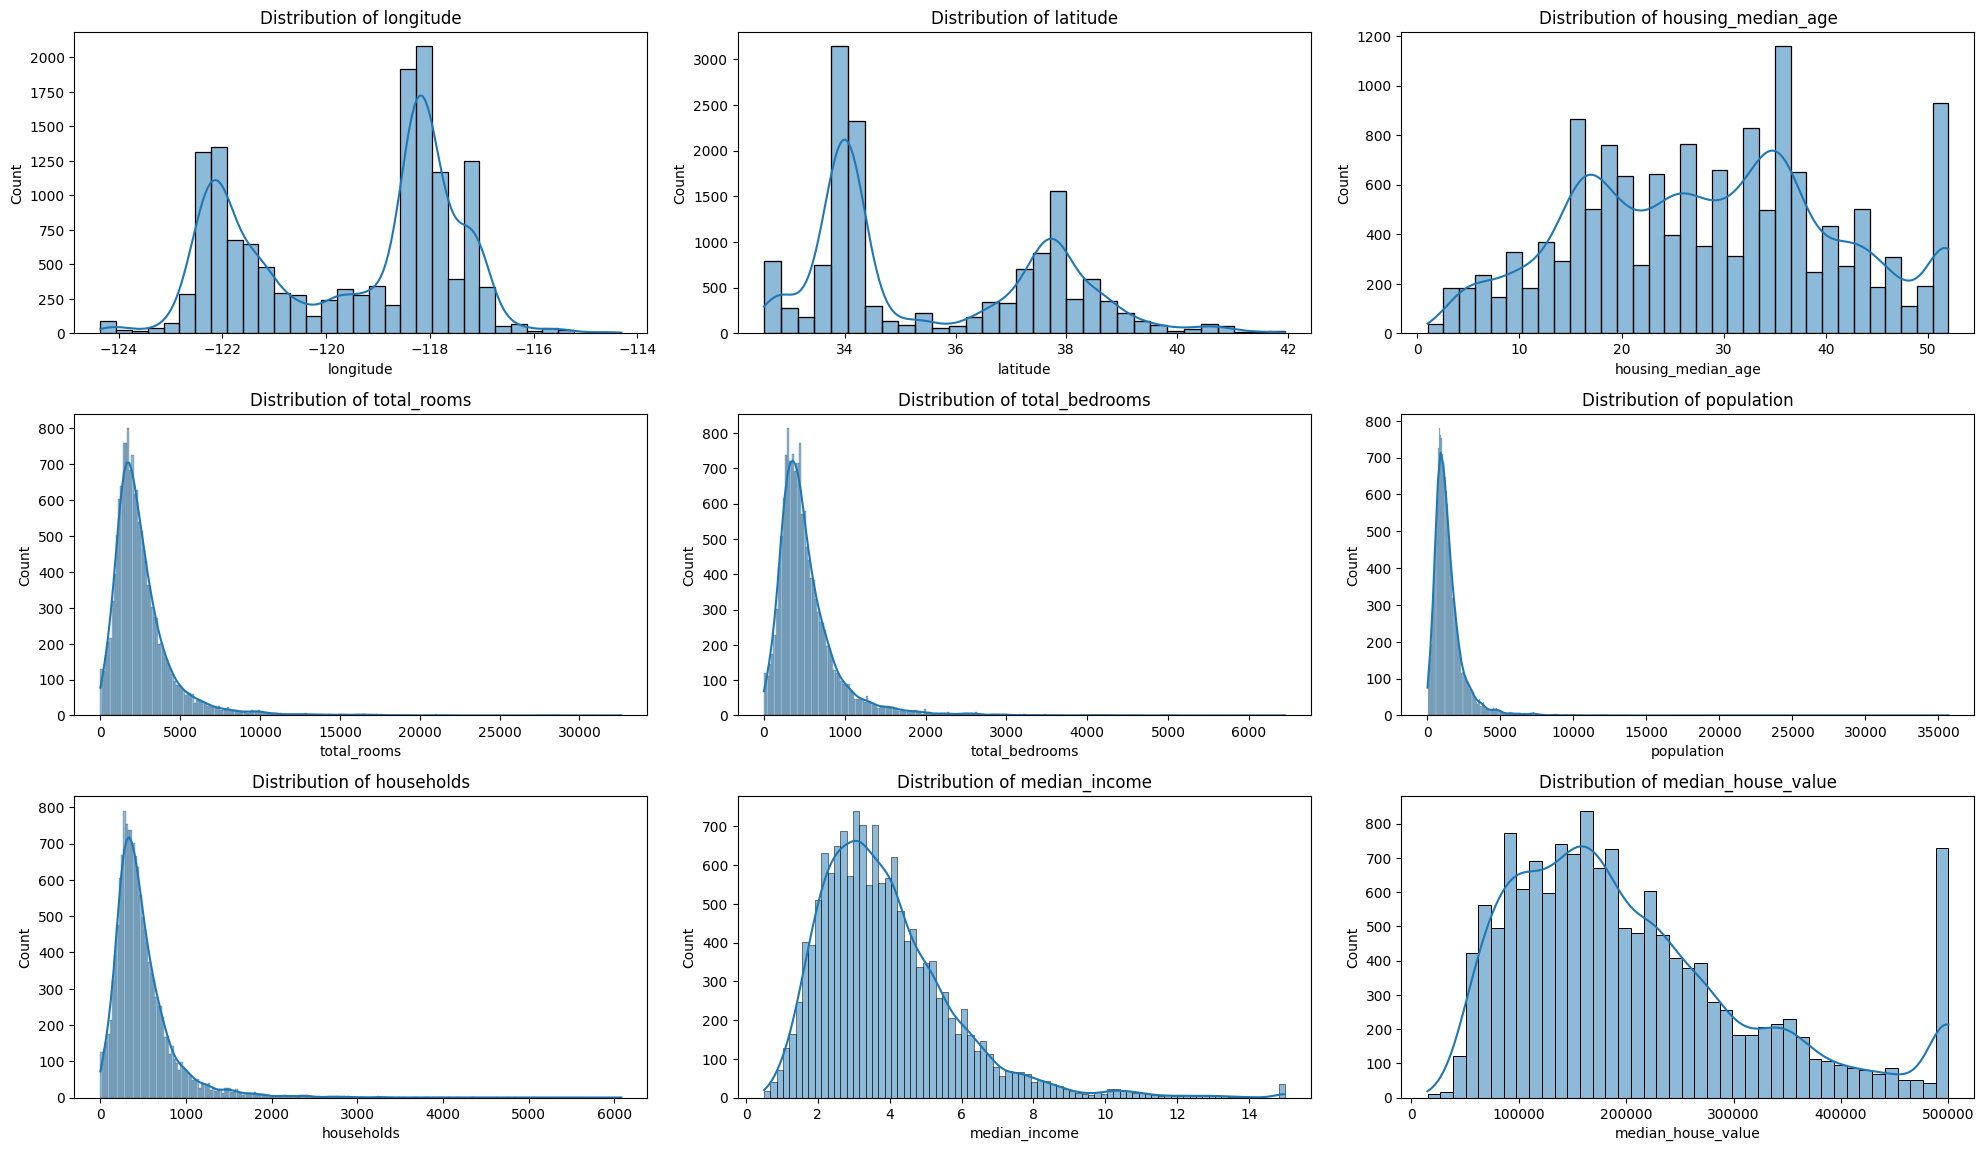

In [20]:
# Data distribution
def plot_data_distribution(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Plotting data distribution
plot_data_distribution(data)

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Skewed Distributions       | Several variables (total_rooms, total_bedrooms, population, households, median_income, and median_house_value) show skewed distributions, indicating that most values are concentrated at the lower end, with some extreme outliers                    |
| Diverse Property Characteristics       | The variation in housing age and the skewed distributions of property features like rooms and bedrooms reflect the diversity of properties in the dataset, from small homes to very large estates                    |
| Income and House Value Relationship       | The distribution of median income and house values suggests that while most properties are within a certain price range, there are some high-value properties, possibly reflecting desirable locations or unique property features                           |

--

### 2.7. Scatter Plot Location

2.7.1. Raw Scatter Plot

<Axes: xlabel='longitude', ylabel='latitude'>

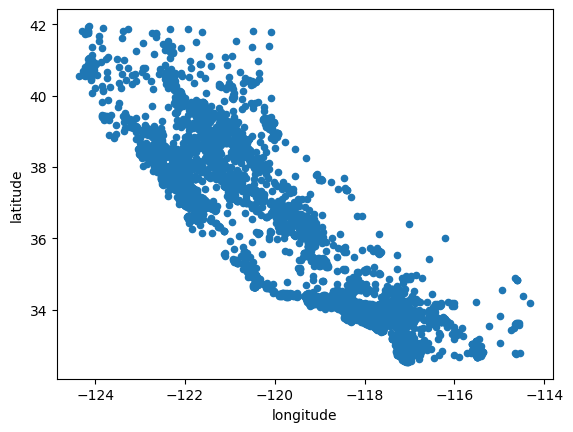

In [21]:
data.plot(kind='scatter', x='longitude', y='latitude')

2.7.2. Better Scatter Plot

<Axes: xlabel='longitude', ylabel='latitude'>

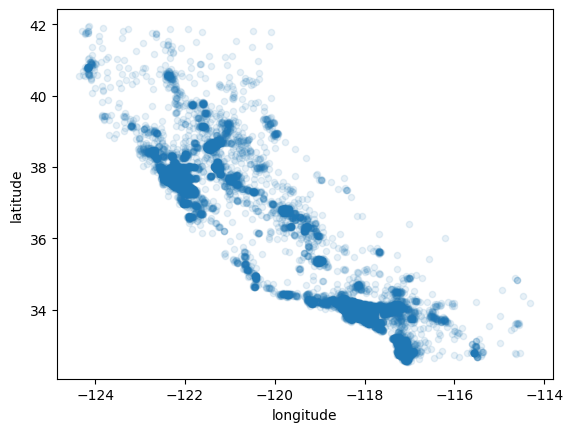

In [22]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

---

# 3. Exploratory Data Analysis

### 3.1. Data Correlation

3.1.1. Heatmap

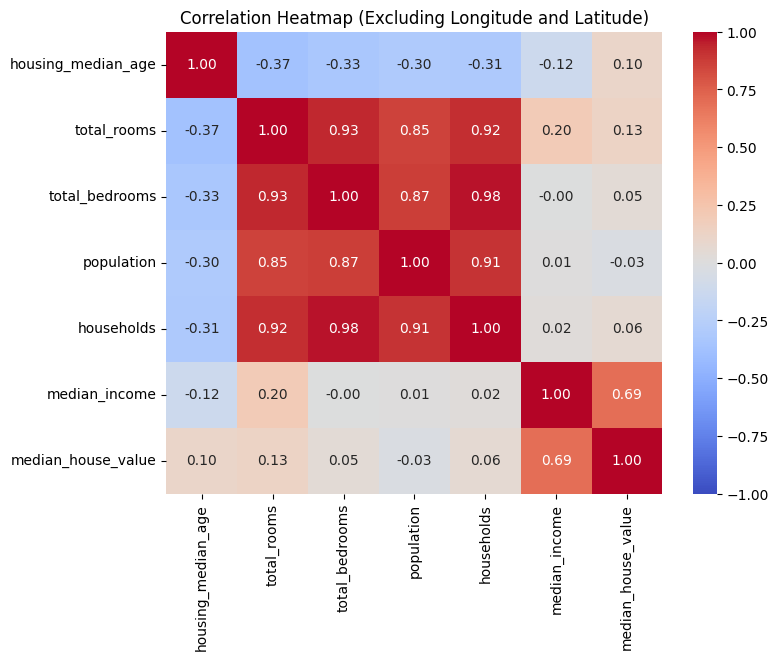

In [23]:
# Exclude 'longitude' and 'latitude' columns
selected_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Calculate correlation matrix for the selected columns
correlation_matrix = data[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Excluding Longitude and Latitude)')
plt.show()

- This heatmap reveals strong positive correlations between total_rooms, total_bedrooms, population, and households, with correlation coefficients ranging from 0.85 to 0.98.
- These variables are closely related, likely because they all measure aspects of property size and community density.
- Additionally, median_income shows a moderate positive correlation with median_house_value (0.69), indicating that higher income areas tend to have higher property values. These relationships are significant and can be important predictors in modeling property prices.

--

3.1.2. Statistical Tests Correlation For Low Correlation Columns

In [24]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# List of pairs with low correlations to test
low_corr_pairs = [
    ('housing_median_age', 'median_house_value'),
    ('total_rooms', 'median_income'),
    ('total_bedrooms', 'median_house_value'),
    ('population', 'median_house_value'),
    ('households', 'median_house_value'),
]

# Dictionary to store results for Spearman and Kendall
spearman_results = {}
kendall_results = {}

# Perform Spearman and Kendall correlation tests
for pair in low_corr_pairs:
    spearman_corr, spearman_p_value = spearmanr(data[pair[0]], data[pair[1]])
    kendall_corr, kendall_p_value = kendalltau(data[pair[0]], data[pair[1]])
    
    spearman_results[pair] = {'spearman_corr': spearman_corr, 'spearman_p_value': spearman_p_value}
    kendall_results[pair] = {'kendall_corr': kendall_corr, 'kendall_p_value': kendall_p_value}

# Convert the results into DataFrames
spearman_df = pd.DataFrame(spearman_results).T
kendall_df = pd.DataFrame(kendall_results).T

In [25]:
spearman_df

,,spearman_corr,spearman_p_value
housing_median_age,median_house_value,0.071909,5.003942e-18
total_rooms,median_income,0.271077,1.011916e-241
total_bedrooms,median_house_value,0.081205,1.434753e-22
population,median_house_value,-0.001521,8.549883e-01
households,median_house_value,0.108335,5.705029e-39


In [26]:
kendall_df

,,kendall_corr,kendall_p_value
housing_median_age,median_house_value,0.047868,1.754132e-17
total_rooms,median_income,0.183345,1.881396e-239
total_bedrooms,median_house_value,0.054304,1.511274e-22
population,median_house_value,-0.001314,8.130851e-01
households,median_house_value,0.072397,8.753323e-39


- Summary:
    - This analysis highlights that while there may be some significant correlations, their practical impact is limited.
    - It is quite similar to what have the heatmap shown.

--

### 3.2. Explore Feature and Target Relationships
- Objective: Understand how individual features impact the target variable (median_house_value).
- Approach:
    - Generate scatter plots, box plots, or other visualizations to explore relationships between features and the target variable
    - Consider the potential use of advanced techniques like clustering to identify groups within the data that share similar characteristics and analyze their impact on house values

3.2.1. Scatter Plot for median_income vs. median_house_value
- Purpose: 
    - To observe the trend between income and house values. Typically, higher income is associated with higher house values.

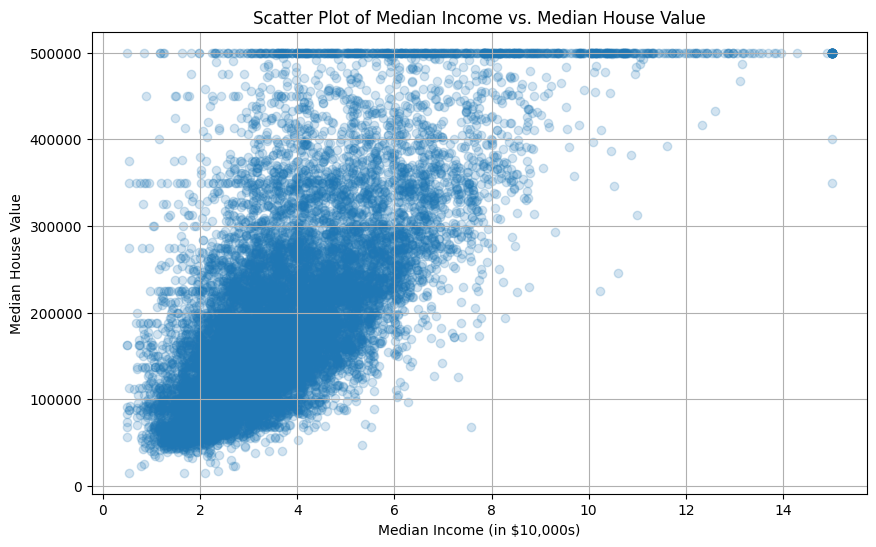

In [27]:
# Scatter plot of median_income vs. median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.2)
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

- Analysis:

| **Analysis** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Positive Correlation       | There is a clear positive correlation between median_income and median_house_value. As median income increases, the median house value also tends to increase. This relationship is intuitive, as higher income levels generally lead to higher purchasing power, enabling people to afford more expensive homes                    |
| Ceiling Effect at $500,000       | There is a noticeable horizontal line at the $500,000 mark, indicating a cap on median_house_value. This suggests that the dataset may have a maximum recorded value for house prices, possibly due to a data collection or reporting limit. Many homes have values clustered at this upper limit, which could distort some analyses if not accounted for                    |
| Distribution of Data Points       | The majority of data points are concentrated in the lower left section of the plot, where both income and house values are relatively low. This suggests that a significant portion of the population falls within lower income brackets, correlating with more affordable housing                           |
|      | There are fewer data points as income increases, with a wider spread of house values. This indicates more variability in house prices as income levels rise                           |

--

3.2.2. Distribution of Median House Values

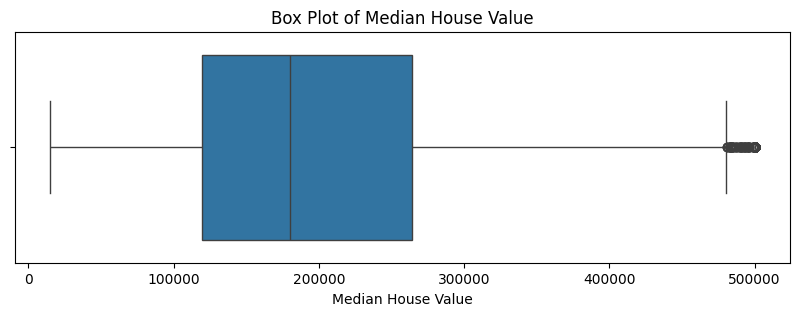

In [28]:
# Box plot for 'median_house_value'
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

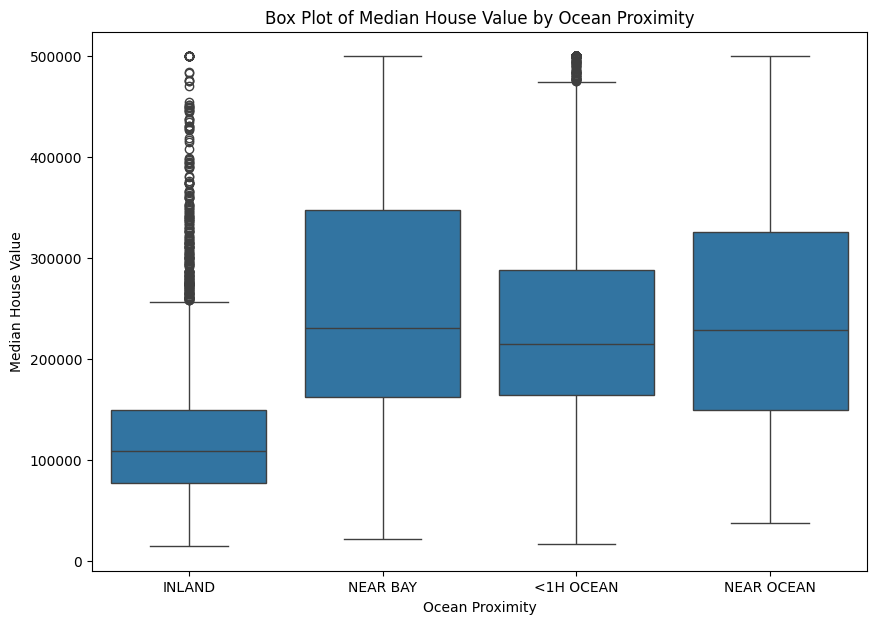

In [29]:
# Box plot for 'median_house_value' by 'ocean_proximity'
plt.figure(figsize=(10, 7))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Impact of Proximity to Water       | Proximity to water (ocean, bay, or being on an island) significantly increases property values. Inland properties are generally less valuable, while those near water or on islands command higher prices                    |
| Variation in Property Values       | There is considerable variation in property values within each category, especially for inland and near-ocean properties. This could be due to differences in property size, amenities, or specific location factors                    |
| Outliers       | Inland properties have the most significant number of outliers, indicating that while most properties are less expensive, there are some high-value exceptions, likely due to specific desirable characteristics                           |

- These insights highlight the importance of location, especially proximity to water, in determining property values. The outliers in the inland category suggest that even in generally less expensive areas, certain properties can achieve much higher prices, possibly due to unique features.

--

3.2.3. Population and Median House Value Scatter Plot

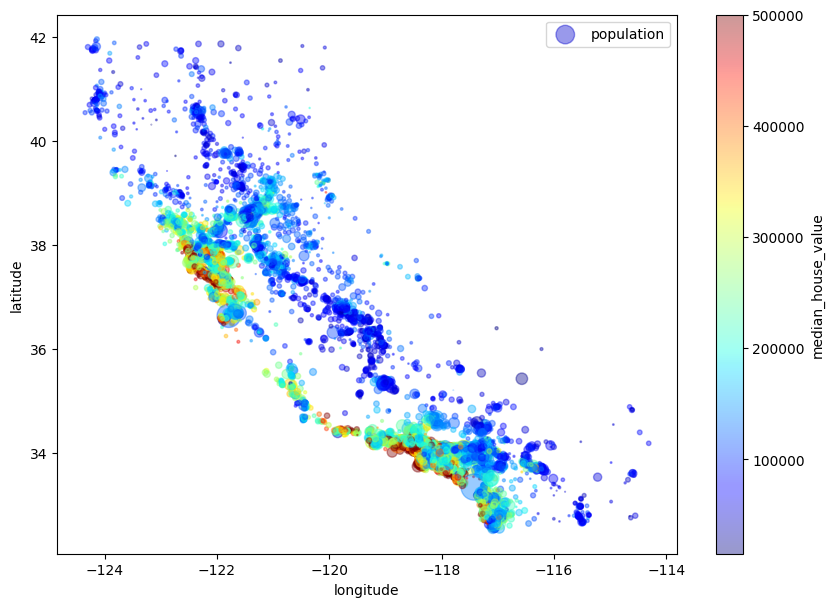

In [30]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
        s= data["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
sharex=False)
plt.legend()

- The scatter plot reveals distinct patterns and areas with varying house prices. 
- Generally, house prices increase as properties are located closer to the ocean and in densely populated regions. Applying a clustering algorithm could help identify the main clusters, which could lead to creating new features that measure proximity to these cluster centers. 
- The ocean_proximity attribute might also be beneficial, although in Northern California, coastal districts don’t always have the highest prices, indicating that location alone doesn’t fully determine property value.

--

3.2.4. Ceiling Effects Analysis

In [31]:
# Count the number of rows where median_house_value is capped at $500,000
capped_values_count = data[data['median_house_value'] == 500000].shape[0]

# Display the result
print(f"Number of rows with capped values at $500,000: {capped_values_count}")

Number of rows with capped values at $500,000: 18


In [32]:
# Filter rows with capped median_house_value
capped_rows = data[data['median_house_value'] == 500000]

# Summary statistics for capped rows
capped_rows_summary = capped_rows.describe()

# Display the summary
capped_rows_summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,-120.461111,35.908889,37.944444,2195.611111,545.833333,1014.166667,500.555556,3.875456,500000.0
std,2.223600,1.968669,13.527628,1194.100210,358.113234,696.184750,317.814823,1.239169,0.0
min,-122.490000,33.190000,19.000000,352.000000,41.000000,99.000000,34.000000,1.265600,500000.0
25%,-122.437500,34.002500,26.750000,1630.000000,366.750000,751.250000,356.250000,3.311225,500000.0
50%,-122.130000,37.050000,33.500000,2189.500000,422.000000,859.000000,414.000000,3.825400,500000.0
75%,-118.230000,37.767500,52.000000,2596.000000,613.250000,1054.000000,576.750000,4.673800,500000.0
max,-117.380000,37.800000,52.000000,5283.000000,1330.000000,2667.000000,1269.000000,5.840800,500000.0


In [33]:
# Summary statistics for the full dataset
full_dataset_summary = data.describe()

# Display the summary for comparison
full_dataset_summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000
mean,-119.566807,35.630404,28.617057,2640.285339,537.300222,1425.249273,499.536273,3.866826,206804.650076
std,2.006679,2.140106,12.596064,2191.704433,421.703530,1149.626251,383.114853,1.891240,115358.542671
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570400,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,179950.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263800.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Conclusion:

    - The analysis shows that capped values, though few, represent properties in potentially older and more established neighborhoods. These properties are not necessarily in areas with the highest incomes, indicating that other factors (e.g., location, demand, and scarcity) might be driving the high prices.

--

3.2.5. Explanation for Not Mitigating the Ceiling Effect

- In this analysis, the decision was made not to mitigate the ceiling effect present in the median_house_value at $500,000. Instead, the focus is on using the median for feature engineering and other modeling steps. This approach was chosen for the following reasons:

    1.	Robustness Against Outliers:
        - The median is less sensitive to outliers and extreme values, such as the capped house values at $500,000. By relying on the median, the model remains robust and reduces the influence of these extreme values, ensuring more reliable insights from the data.
    2.	Simplicity and Consistency:
        - Avoiding additional steps to mitigate the ceiling effect allows the analysis to proceed in a straightforward manner. This approach ensures consistency across the dataset and avoids introducing complexity that might complicate the interpretation of results.
    3.	Representation of Real-World Conditions:
        - The ceiling effect at $500,000 likely reflects real-world market conditions, such as reporting limits or demand saturation in certain areas. By retaining the original data distribution, the analysis maintains its alignment with these real-world phenomena.
    4.	Focus on Median-Based Insights:
        - Given the skewed nature of the data, using the median as the central tendency measure throughout the analysis helps provide a more accurate representation of typical values, minimizing the impact of extreme data points on the overall model.
    
- Future Consideration:
    - As the analysis progresses, especially during model evaluation, the decision to not mitigate the ceiling effect will be revisited if significant issues arise in predicting high-value properties. Adjustments may be made post-modeling if necessary to ensure accurate predictions across all property values.

---

# 4. Data Preparation

### 4.1. Data Preprocessing

4.1.1. Correlation Matrix and Heatmap

median_house_value    1.000000
median_income         0.693481
total_rooms           0.132051
housing_median_age    0.103656
households            0.061655
total_bedrooms        0.045661
population           -0.026109
longitude            -0.045887
latitude             -0.143803
Name: median_house_value, dtype: float64


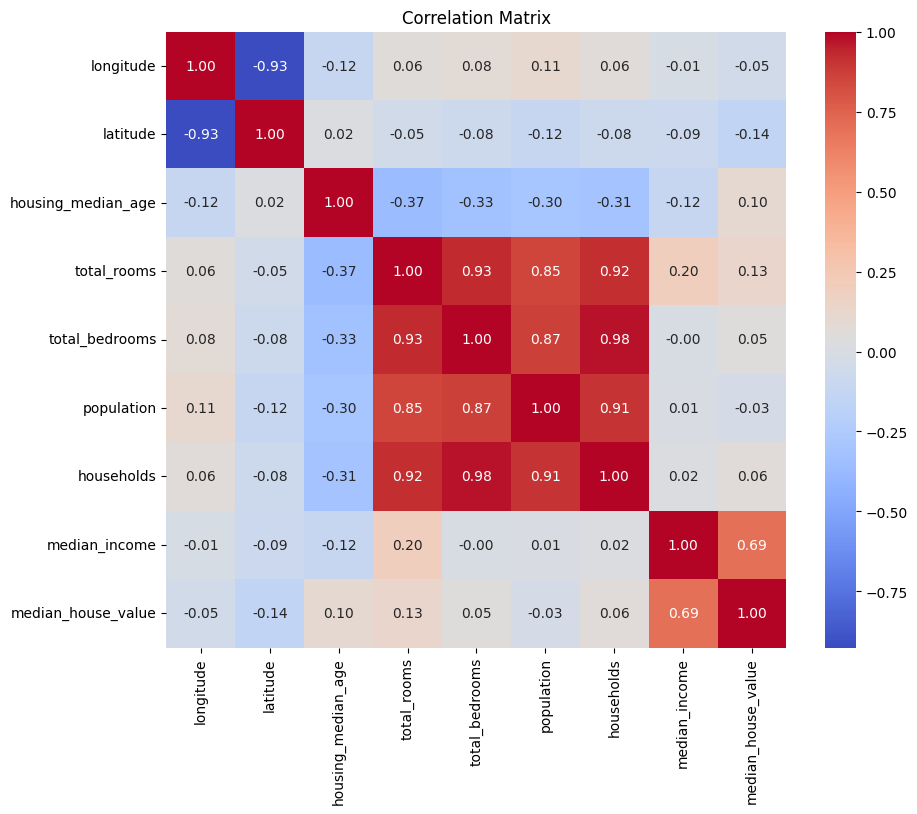

In [34]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation with respect to the target variable
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Correlation Matrix Key Observations:

1.	Median Income:
    - Has the strongest positive correlation with median_house_value at 0.69. This suggests that higher incomes are generally associated with higher house values.
2.	Total Rooms:
    - Shows a weak positive correlation with median_house_value at 0.13. This implies that as the number of rooms increases, the house value might slightly increase, but the relationship is not strong.
3.	Housing Median Age:
    - Also has a weak positive correlation with median_house_value at 0.10, indicating a slight relationship between older houses and house value.
4.	Households, Total Bedrooms, and Population:
    - These features show very weak correlations with median_house_value, with values close to 0. This indicates that these features may not be very predictive of house values.
5.	Longitude and Latitude:
    - Both have weak negative correlations with median_house_value, especially latitude (-0.14). This suggests that geographic location (as measured by these coordinates) has a minimal, but somewhat negative impact on house value.

- Next Steps:

    - Given the weak correlations observed, especially for features like total_bedrooms, population, and households, it might be worth considering further statistical tests, like Spearman and Kendall tests, to confirm the relevance of these features.

- Heatmap Key Observations:

1.	Strong Correlations Among Some Features:
    - There are strong positive correlations between total_rooms, total_bedrooms, population, and households. For example:
        - total_rooms and total_bedrooms have a very high correlation (around 0.93).
        - population and households also show a strong positive correlation (around 0.91).
            - This suggests that these features might be capturing similar aspects of housing density or size, potentially leading to multicollinearity issues in some models.
2.	Median Income as a Significant Predictor:
    - median_income has a relatively strong positive correlation with median_house_value (around 0.69). 
        - This suggests that median_income is likely a significant predictor of housing prices, which aligns with expectations—higher income areas typically have higher property values.
3.	Weak or Minimal Correlations:
    - Features like housing_median_age, total_rooms, and households have weak positive correlations with median_house_value.
        - These weak correlations suggest that these features might not be as impactful in predicting house values individually.
    - population shows a very weak negative correlation with median_house_value, indicating it might not be a strong predictor.
4.	Overall Interpretation:
    - The heatmap shows that median_income stands out as a strong predictor, while other features might contribute less individually but could still play a role in combination.
    - The strong correlations among features related to housing size and density suggest a need to carefully consider their inclusion to avoid redundancy in the model.

--

4.1.2. Spearman and Kendall Correlation Tests

In [35]:
# List of additional features to test (those with weak correlations from the heatmap)
additional_features = ['total_bedrooms', 'population', 'households']

# Dictionary to store results
spearman_results = {}
kendall_results = {}

# Perform Spearman and Kendall correlation tests
for feature in additional_features:
    spearman_corr, spearman_p_value = spearmanr(data[feature], data['median_house_value'])
    kendall_corr, kendall_p_value = kendalltau(data[feature], data['median_house_value'])
    
    spearman_results[feature] = {'spearman_corr': spearman_corr, 'spearman_p_value': spearman_p_value}
    kendall_results[feature] = {'kendall_corr': kendall_corr, 'kendall_p_value': kendall_p_value}

# Convert results to DataFrame for display
spearman_df = pd.DataFrame(spearman_results).T
kendall_df = pd.DataFrame(kendall_results).T

In [36]:
spearman_df

,spearman_corr,spearman_p_value
total_bedrooms,0.081205,1.434753e-22
population,-0.001521,8.549883e-01
households,0.108335,5.705029e-39


- total_bedrooms: 
    - Shows a weak positive correlation with median_house_value (0.081205) with a very significant p-value, indicating that while the relationship is weak, it is statistically significant.
- population: 
    - Has a near-zero correlation (-0.001521) with median_house_value and an insignificant p-value, suggesting no meaningful relationship.
- households: 
    - Shows a weak positive correlation with median_house_value (0.108335) with a very significant p-value, indicating a statistically significant but weak relationship.

In [37]:
kendall_df

,kendall_corr,kendall_p_value
total_bedrooms,0.054304,1.511274e-22
population,-0.001314,8.130851e-01
households,0.072397,8.753323e-39


- total_bedrooms: 
    - Similarly to the Spearman test, there is a weak positive correlation (0.054304) with a very significant p-value.
- population:
    - Also reflects a near-zero correlation (-0.001314) with an insignificant p-value, reinforcing the Spearman test’s result.
- households:
    - Shows a weak positive correlation (0.072397) with a significant p-value, consistent with the Spearman test.

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Weak Correlations       | total_bedrooms and households suggest that while these features have some relationship with median_house_value, their impact is likely minimal                    |
| Near-Zero Correlation       | population suggests it may not be a valuable predictor for median_house_value and might be considered for exclusion in feature selection                    |
| Both Tests       | onsistent in their results, confirming the relationships (or lack thereof) between these features and median_house_value                           |

--

### 4.2. Feature Engineering

4.2.1. Creating New Features

In [38]:
# 1. rooms_per_capita
data['rooms_per_capita'] = data['total_rooms'] / data['population']

# 2. rooms_per_household
data['rooms_per_household'] = data['total_rooms'] / data['households']

# 3. Population per Room
data['population_per_room'] = data['population'] / data['total_rooms']

# 4. Income per Capita
data['income_per_capita'] = data['median_income'] / data['population']

# 5. Household Density
data['household_density'] = data['households'] / data['population']

# Display the first few rows to confirm the new features have been added correctly
data[['rooms_per_capita', 'rooms_per_household', 'population_per_room', 'income_per_capita', 'household_density']].head()

,rooms_per_capita,rooms_per_household,population_per_room,income_per_capita,household_density
0,0.580311,2.800000,1.723214,0.010233,0.207254
1,1.216507,3.671480,0.822026,0.002704,0.331340
2,1.700072,6.478022,0.588210,0.004541,0.262437
3,0.825303,2.518000,1.211676,0.000564,0.327761
4,1.273927,4.622754,0.784974,0.003664,0.275578


| **New Feature** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Rooms per Capita        | Areas with higher rooms_per_capita may be associated with higher property values, as more space per person often correlates with better living conditions and higher demand                    |
| Rooms per Household       | Homes with more rooms per household could suggest larger, potentially more expensive properties, contributing to higher median house values                    |
| Population per Room       | A higher population_per_room might indicate overcrowding, which could be associated with lower property values. Conversely, lower values might indicate more luxurious living conditions                           |
| Income per Capita        | It helps capture the economic status of an area, which is a critical factor in real estate pricing                    |
| Household Density       | Higher household density might suggest smaller households or more households in a given area, which could correlate with different property types or price ranges                    |

- Feature Engineering Reasons:
    - These features are chosen because they provide a deeper understanding of the living conditions, economic status, and demographic distribution within the dataset, which are all factors that can significantly influence property values.
    - By engineering these features, the model can capture more nuanced relationships in the data, potentially improving its predictive performance.

--

### 4.3. Transforming the Target Variable

4.3.1. Finding the Best Scaler

In [39]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

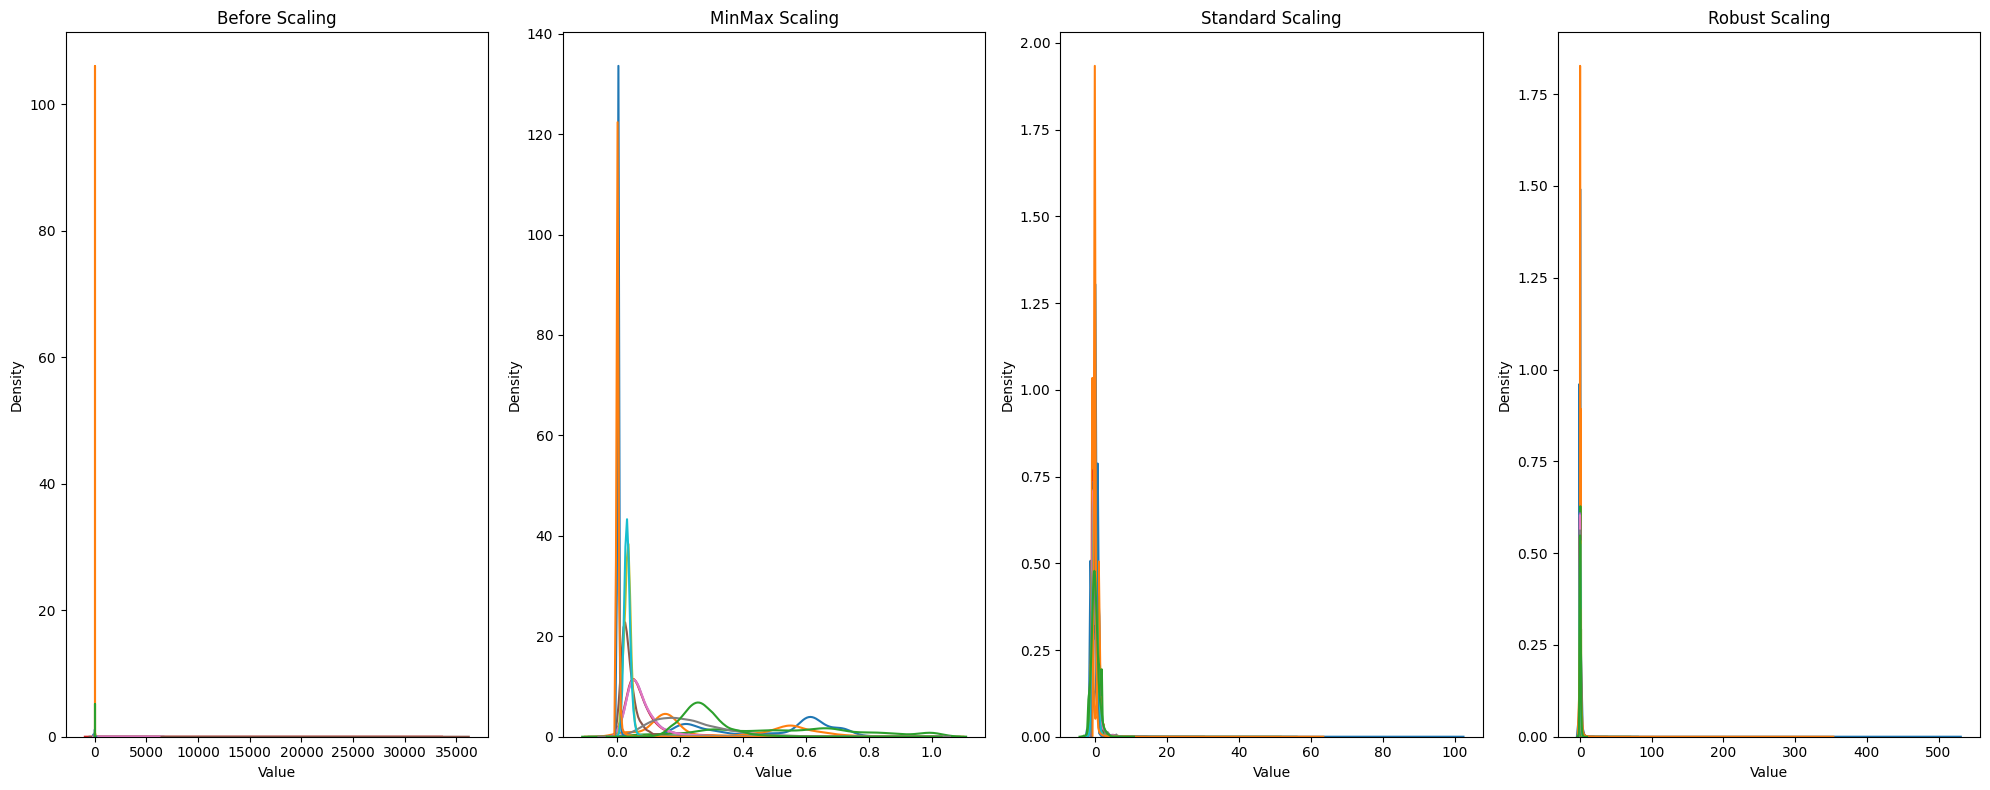

In [40]:
# Combine X_train and X_test for visualization purposes
combined_data = pd.concat([X_train, X_test], axis=0)

# Select only numeric columns
numeric_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Define scalers
scalers = {
    'Before Scaling': combined_data[numeric_cols],
    'MinMax Scaling': MinMaxScaler(),
    'Standard Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Plotting
plt.figure(figsize=(20, 8))

for i, (scaler_name, scaler) in enumerate(scalers.items()):
    plt.subplot(1, 4, i + 1)

    if scaler_name == 'Before Scaling':
        scaled_data = combined_data[numeric_cols]
    else:
        scaled_data = pd.DataFrame(scaler.fit_transform(combined_data[numeric_cols]), columns=numeric_cols)

    for column in scaled_data.columns:
        sns.kdeplot(scaled_data[column], label=column)

    plt.title(scaler_name)
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [41]:
# Assume 'data' is your DataFrame with the appropriate columns
# Define your features (X) and target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the scalers to evaluate
scalers = [
    ('StandardScaler', StandardScaler()),
    ('MinMaxScaler', MinMaxScaler()),
    ('RobustScaler', RobustScaler())
]

# Evaluate each scaler
best_scaler = None
best_score = float('inf')

for scaler_name, scaler in scalers:
    # Apply OneHotEncoder to the categorical column and the scaler to the numerical columns
    transformer = ColumnTransformer([
        ('OneHot', OneHotEncoder(handle_unknown='ignore', drop='first'), ['ocean_proximity']),
        ('Scaler', scaler, X_train.columns.drop('ocean_proximity'))  # Apply scaler only to numeric columns
    ], remainder='passthrough')
    
    estimator = Pipeline(steps=[
        ('preprocessing', transformer),
        ('model', RandomForestRegressor(random_state=42))  # Example model
    ])
    
    # Perform cross-validation
    cv_mae = cross_val_score(estimator, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    mean_mae = -cv_mae.mean()
    
    print(f"{scaler_name}: Mean MAE = {mean_mae:.4f}")
    
    if mean_mae < best_score:
        best_score = mean_mae
        best_scaler = scaler_name

print(f"Best scaler: {best_scaler}")

StandardScaler: Mean MAE = 34057.1416
MinMaxScaler: Mean MAE = 34049.1776
RobustScaler: Mean MAE = 34068.2309
Best scaler: MinMaxScaler


--

### 4.4. Model Selection and Training

In [42]:
# Assuming 'data' is already loaded and preprocessed with feature engineering

# Separate the features and target variable
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', MinMaxScaler(), X_train.drop(['ocean_proximity'], axis=1).columns)
    ]
)

# Define a function for log transformation and its inverse
log_transform = np.log1p
inverse_log_transform = np.expm1

# Define models to be evaluated
models = {
    'XGBoost': XGBRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LightGBM': LGBMRegressor(verbose=-1),
    'ExtraTrees': ExtraTreesRegressor()
}

# Evaluate each model
results = []

for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model with TransformedTargetRegressor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=model,
            func=log_transform,
            inverse_func=inverse_log_transform,
            check_inverse=False
        ))
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the training and test sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({
        'Model': model_name,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='R² Test', ascending=False, inplace=True)

# Display the DataFrame
results_df

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
Model,,,,,,
LightGBM,2.672722e+04,29750.583995,4.091015e+04,46122.108512,0.874837,0.836939
XGBoost,1.778411e+04,30499.000727,2.705147e+04,48029.120381,0.945274,0.823176
RandomForest,1.235648e+04,30885.081681,2.086802e+04,48729.368231,0.967433,0.817983
ExtraTrees,5.562669e-06,31999.235249,2.568779e-04,49681.399192,1.000000,0.810801
GradientBoosting,3.512775e+04,35311.172414,5.243599e+04,52750.395232,0.794377,0.786704
SVR,3.886932e+04,37558.288486,5.869318e+04,56629.270236,0.742375,0.754182
DecisionTree,1.837195e-10,42969.415571,8.190058e-10,67210.671089,1.000000,0.653736
AdaBoost,5.489672e+04,53242.233629,8.081270e+04,78903.657664,0.511604,0.522773
Ridge,4.895827e+04,47824.116132,8.164428e+04,80323.148262,0.501501,0.505447


--

4.2.3. Feature Selection

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', MinMaxScaler(), X_train.drop(['ocean_proximity'], axis=1).columns)
    ]
)

# Define a list of models to evaluate
models = {
    'LightGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'RandomForest': RandomForestRegressor()
}

# Initialize a list to store the feature selection results
feature_selection_results = []

# Iterate through each model
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Perform feature selection using SelectFromModel
    selector = SelectFromModel(pipeline.named_steps['model'], prefit=True, threshold="mean")
    
    # Apply the selector to the transformed data
    X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
    X_train_selected = selector.transform(X_train_transformed)
    
    # Evaluate the model with the selected features
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')
    
    # Get feature names after transformation (one-hot encoded)
    selected_features = np.array(pipeline.named_steps['preprocessor'].get_feature_names_out())[selector.get_support()]
    
    # Store the results in a dictionary
    feature_selection_results.append({
        'model': model_name,
        'selected_features': list(selected_features),
        'cv_scores': list(cv_scores),
        'avg_score': np.mean(cv_scores)
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(feature_selection_results)

# Display the DataFrame
results_df

,model,selected_features,cv_scores,avg_score
0,LightGBM,"[num__longitude, num__latitude, num__housing_median_age, num__median_income, num__rooms_per_household, num__household_density]","[0.8414141000395993, 0.8200809398092657, 0.8262717467257247, 0.8312057497117903, 0.8321650142407387]",0.830228
1,XGBoost,"[onehot__ocean_proximity_INLAND, num__median_income, num__population_per_room]","[0.6088785095099793, 0.6104606113073212, 0.6074230370950326, 0.6000564113690252, 0.6349661714548265]",0.612357
2,RandomForest,"[onehot__ocean_proximity_INLAND, num__longitude, num__median_income, num__household_density]","[0.7460060362658312, 0.7378950408831049, 0.7378791521286385, 0.7369464048691787, 0.7495294800420463]",0.741651


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', MinMaxScaler(), X_train.drop(['ocean_proximity'], axis=1).columns)
    ]
)

# Define the LightGBM model
model = LGBMRegressor()

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Perform feature selection using SelectFromModel
selector = SelectFromModel(pipeline.named_steps['model'], prefit=True, threshold="mean")

# Apply the selector to the transformed data
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Get feature names after transformation (one-hot encoded)
selected_features = np.array(pipeline.named_steps['preprocessor'].get_feature_names_out())[selector.get_support()]

# Required features to include
required_features = [
    'num__longitude', 'num__latitude', 'num__housing_median_age', 
    'num__median_income', 'num__rooms_per_household', 'num__household_density',
    'onehot__ocean_proximity_<1H OCEAN', 'onehot__ocean_proximity_INLAND',
    'onehot__ocean_proximity_ISLAND', 'onehot__ocean_proximity_NEAR BAY', 
    'onehot__ocean_proximity_NEAR OCEAN'
]

# Ensure required features are included
final_selected_features = np.unique(np.concatenate([selected_features, required_features]))

# Identify excluded features
all_features = pipeline.named_steps['preprocessor'].get_feature_names_out()
excluded_features = set(all_features) - set(final_selected_features)

# Display excluded features
excluded_features

{'num__households',
 'num__income_per_capita',
 'num__population',
 'num__population_per_room',
 'num__rooms_per_capita',
 'num__total_bedrooms',
 'num__total_rooms'}

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', MinMaxScaler(), X_train.drop(['ocean_proximity'], axis=1).columns)
    ]
)

# Define the LightGBM model
model = LGBMRegressor()

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Perform feature selection using SelectFromModel
selector = SelectFromModel(pipeline.named_steps['model'], prefit=True, threshold="mean")

# Apply the selector to the transformed data
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Required features to include
required_features = [
    'num__longitude', 'num__latitude', 'num__housing_median_age', 
    'num__median_income', 'num__rooms_per_household', 'num__household_density',
    'onehot__ocean_proximity_<1H OCEAN', 'onehot__ocean_proximity_INLAND',
    'onehot__ocean_proximity_ISLAND', 'onehot__ocean_proximity_NEAR BAY', 
    'onehot__ocean_proximity_NEAR OCEAN'
]

# Ensure required features are included
selected_features = np.array(pipeline.named_steps['preprocessor'].get_feature_names_out())[selector.get_support()]
final_selected_features = np.unique(np.concatenate([selected_features, required_features]))

# Select the final set of features
X_train_final = X_train_transformed[:, np.isin(pipeline.named_steps['preprocessor'].get_feature_names_out(), final_selected_features)]

# Evaluate the model with the final selected features
cv_scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='r2')

# Calculate the average score
avg_score = np.mean(cv_scores)

avg_score

0.8324713627170486

4.2.4. Selected Features

4.2.5. Data Scaling

--

4.2.6. Visualization Before & After Scaling

--

### 4.3. Building Pipeline

4.3.1. Pipeline 1 All Features (Finding The Best Models)

4.3.2. Pipeline 2 Selected Features (Finding The Best Models)

- Summary 1:

    - XGBoost, RandomForest, and LightGBM: These models perform similarly with both all features and selected features, showing their robustness.
    - GradientBoosting: Shows a slight drop in performance with selected features.
    - DecisionTree: Shows improvement with selected features, indicating it might have benefited from a reduced feature set.

- Summary 2 (R^2 Train and R^2 Test Results)
    - XGBoost: Slight reduction in overfitting with selected features, maintaining strong generalization.
    - RandomForest: Overfitting remains consistent with both feature sets, though slightly better with selected features.
    - LightGBM: Minimal overfitting in both cases, with slightly better generalization using all features.

---

# 5. Modeling Experiment

### 5.1. Hyperparameter Tuning
- Objective:
    - Optimize the models by finding the best combination of hyperparameters.

5.1.1. Hyperparameter 1

--

### 5.2. Final Model Evaluation

--

--

--

5.2.4. Learning Curve Display r2 Score

--

5.2.5. Learning Curve Display Training vs Cross-Validation Score (MAE)

--

### 5.3. Final Model Validation

5.3.1. Split The Data

--

5.3.2. Train the Final Model on the Combined Training and Validation Set

5.3.3. Predict on the Holdout Set (Unseen Data)

--

5.3.4. Evaluate the Performance on the Holdout Set

--

### 5.4. Finalization of the Model

5.4.1. Combine Training and Validation Data & Retrain the Final Model

--

--

### 5.5. Inverse or Transform Back the Target Feature Into Original Value